# Naïve Bais For Spam and Non Spam Classification

In [33]:
import glob
import numpy as np
import pandas as pd
import os
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_directory = 'Task6_DataSet'
os.chdir(data_directory)

In [3]:
print(os.getcwd())

/Users/shivam/Desktop/Learning/Semester II/Machine Learning/Machine-Learning-Lab/Task6_DataSet


In [4]:
# Generate a random number to use it as a testing dataset
testing_set_number = random.randint(1,10)
print('We Will use Part{} as test dataset'.format(testing_set_number))

We Will use Part4 as test dataset


In [5]:
def populate_data(data_dictionary, filename):
    with open(filename) as file:
        file_data = []
        for line in file:
            if line:
                if 'Subject' in line:
                    data_dictionary['Subject'].append(line.split(':')[1].strip())
                else:
                    file_data.append(line.strip())

        data_dictionary['message'].append(''.join(file_data))
        if 'legit' in filename:
            data_dictionary['spam'].append(0)
        else:
            data_dictionary['spam'].append(1)
        data_dictionary['filename'].append(filename)
        
        

In [6]:
# Generate out DataFrame
X = {'filename': [], 'Subject' : [], 'message' : [], 'spam' : []}
Y = {'filename': [], 'Subject' : [], 'message' : [], 'spam' : []}


for file in glob.iglob('**/*', recursive=True):
    if os.path.isfile(file):
        if 'part{}/'.format(testing_set_number) in file:
            populate_data(Y, file)
        else:
            populate_data(X, file)
        
            
        

In [7]:
X_data = pd.DataFrame(X)
Y_data = pd.DataFrame(Y)
print(X_data.shape, Y_data.shape)


(981, 4) (109, 4)


In [8]:
X_data.head(10)

,filename,Subject,message,spam
0,part3/31038legit19.txt,2056 118 20153 11852,284 6818 80 284 13383 80 127 93 84 489 18798 2...,0
1,part3/31024legit30.txt,16351 9568 118 3842 17730 7634 14338 103 69,16502 21946 7634 16893 15149 1613 16538 80 115...,0
2,part3/3435legit3.txt,167 14444 118 1686 118 19310 82 15527 18916 90...,14338 7488 2221 20439 103 80 12116 18469 18706...,0
3,part3/3707spmsg74.txt,1968 21501 80 1968 20235 47 47 47,4822 80 16502 2410 1967 180 262 1847 12146 199...,1
4,part3/31017spmsg80.txt,130 8857,478 17188 130 20259 12808 80 196 17054 1812 17...,1
5,part3/3762legit23.txt,8197 15018,16147 17345 14338 14934 17544 15511 437 80 176...,0
6,part3/3480spmsg75.txt,6306 118 86 86 17212 84 11835 84 1694,16502 11317 160 80 17336 23422 18104 22913 199...,1
7,part3/3987legit52.txt,2056 118 13547 5228 1613 10898 51 1465 51,284 14851 80 196 4339 6427 17753 17345 180 725...,0
8,part3/3285legit50.txt,167 190 82 14988 171 20428 1835 2418 82 7967 3...,20428 1835 2418 82 7967 3788 8584 16502 21856 ...,0
9,part3/3201spmsg99.txt,15527 1613 20382 84 13830,19054 1847 15527 1613 6306 118 86 86 20382 84 ...,1


In [9]:
 Y_data.head(10)

,filename,Subject,message,spam
0,part4/4421legit3.txt,167 190 82 22006 171 86 167 154 171 16975 1193...,19054 7634 1847 21715 2130 14903 13944 84 2176...,0
1,part4/4448spmsg66.txt,6597 15527 23767 1991 16502 20259 131,19054 1847 15691 18844 84 17345 4339 15149 190...,1
2,part4/46legit39.txt,10414 86 16516,284 1705 84 5171 80 196 1591 180 22195 3735 16...,0
3,part4/4780spmsg91.txt,1791 80 14686 13472 17345 47,284 12296 118 19054 1847 1593 14509 19264 2167...,1
4,part4/4749spmsg103.txt,14328 130 3295 1991 16502 20259 15700 47 47,20259 8438 21074 15066 125 775 1593 1991 82 95...,1
5,part4/4596legit0.txt,2056 118 167 14851 132 1878 84 1792 118 230 19...,1791 14851 84 196 17329 1850 709 22180 18957 1...,0
6,part4/4405legit14.txt,2056 118 6086 11082 1967 20255 21767,13611 12445 21399 118 127 196 4339 16811 9570 ...,0
7,part4/4148spmsg95.txt,23540 23096 16296 18247 84 84 84,765 4784 15700 2130 21117 1850 15966 47 6306 1...,1
8,part4/41061spmsg92.txt,17345 4339 23075 13606 2130 8189 17923,16502 9594 8667 1967 118 51 17923 51 14403 215...,1
9,part4/4205legit38.txt,23690 8938 10462,196 24075 8986 1847 20381 14268 3613 19816 183...,0


In [69]:
from collections import defaultdict

def count_it(column):
    counter = defaultdict(int)
    for row in column:
        words = row.split()
        for word in words:
            counter[word] += 1
    return dict(counter)



def get_spam_and_legit_dictionary(data_frame):
    spam_data = data_frame.loc[data_frame['spam'] == 1]
    legit_data = data_frame.loc[data_frame['spam'] == 0]
    spam_subject_counter = count_it(spam_data['Subject'])
    spam_message_counter = count_it(spam_data['message'])
    legit_subject_counter = count_it(legit_data['Subject'])
    legit_message_counter = count_it(legit_data['message'])
    return spam_subject_counter, spam_message_counter, legit_subject_counter, legit_message_counter


In [70]:
spam_subject_count, spam_message_count, legit_subject_count, legit_message_count = get_spam_and_legit_dictionary(X_data)

In [71]:
def convert_values_to_probability(count_dictionary):
    total_number = sum(count_dictionary.values())
    return {k:v/total_number for k,v in count_dictionary.items()}

In [72]:
spam_subject = convert_values_to_probability(spam_subject_count)
spam_message = convert_values_to_probability(spam_message_count)
legit_subject = convert_values_to_probability(legit_subject_count)
legit_message = convert_values_to_probability(legit_message_count)

In [73]:
def probability_of_occurance(data_row, probability_dictionary):
    probability = 1
    words = data_row.split()
    for word in words:
        if word in probability_dictionary:
            probability += probability_dictionary[word]
            
    return probability
                

In [99]:
accuracy_plot = []
for c in range(0,15):
    messages_as_legit = 0
    Y_predict = []
    for i in range(len(Y_data)):
        data_row = Y_data.iloc[i]
        subject_probability_spam = probability_of_occurance(data_row['Subject'], spam_subject)
        subject_probability_legit = probability_of_occurance(data_row['Subject'], legit_subject)
        message_probability_spam = probability_of_occurance(data_row['message'], spam_message)
        message_probability_legit = probability_of_occurance(data_row['message'], legit_message)
    #     print(subject_probability_spam, subject_probability_legit, message_probability_legit, message_probability_spam)
        if (2*subject_probability_spam + message_probability_spam) >= (2*subject_probability_legit + message_probability_legit + c):
            if Y_data['spam'][i] == 0:
                messages_as_legit += 1
            
            Y_predict.append(1)
        else:
            Y_predict.append(0)
    Y_predict = np.array(Y_predict)
    accuracy_plot.append( (  messages_as_legit , accuracy_score(Y_data['spam'], Y_predict)*100 ))
    

In [100]:
accuracy_plot

[(13, 77.98165137614679),
 (11, 68.80733944954129),
 (9, 62.38532110091744),
 (6, 65.13761467889908),
 (3, 66.05504587155964),
 (3, 66.05504587155964),
 (3, 66.05504587155964),
 (3, 65.13761467889908),
 (3, 63.30275229357798),
 (3, 62.38532110091744),
 (2, 62.38532110091744),
 (2, 61.46788990825688),
 (2, 60.550458715596335),
 (2, 60.550458715596335),
 (2, 59.63302752293578)]

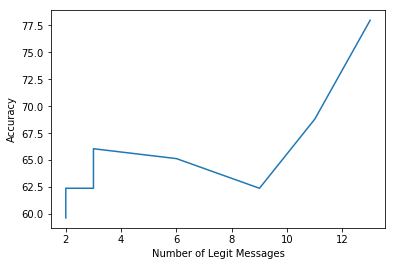

In [101]:
plt.plot([a[0] for a in accuracy_plot], [a[1] for a in accuracy_plot])
plt.ylabel('Accuracy')
plt.xlabel('Number of Legit Messages')
plt.show()

#### Add constant with probability checking and plot based on the constant and accuracy 